In [1]:
import os
import pandas as pd

#### Let's unify all the text files together

In [8]:
path = "./data/raw/lyrics/csv/"
df_all_artists_raw = pd.DataFrame()
for file in os.listdir(path):
    df_single_artist_raw = pd.read_csv(os.path.join(path, file))
    df_all_artists_raw = pd.concat([df_all_artists_raw, df_single_artist_raw])

df_all_artists_raw.tail()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
59,59.0,Khalid,Khalid - Vertigo (Tradução Português),NaN,2018.0,2018-10-28,será que é melhor apenas acreditar nas teorias...
60,60.0,Khalid,Better (Miles Away Remix),NaN,2018.0,2018-12-12,i'm not really drunk i never get that fucked u...
61,61.0,Khalid,Khalid - Better (Official Music Video),NaN,2018.0,2018-05-07,users considering it's a virus or malware must...
62,62.0,Khalid,Perfect Lover,NaN,NaN,NaN,lyrics for this song have yet to be released p...
63,63.0,Khalid,Better (Rennie! Remix),NaN,2019.0,2019-02-01,love to see you shine in the night like the di...


In [10]:
# It looks weird that the index is just 63, there should be a lot more songs. Let's look at the shape
df_all_artists_raw.shape

(6027, 7)

#### Let's dump the "unified" dataset for easy access in the future

In [3]:
path = './data/intermediate'

if not os.path.exists(path):
  os.makedirs(path)

relevant_columns = ['Artist', 'Title', 'Lyric']
df_all_artists_raw[relevant_columns].to_csv(os.path.join(path, 'df_all_artists_raw.tsv'), sep='\t', index=False)

#### Give me all you got, I would like to view all the rows and not be limited by the usual default visible rows

In [4]:
pd.set_option('display.max_rows', None)

In [7]:
# Let's look at the titles
df_all_artists_raw.Title

0                                              New Rules
1                                        Don’t Start Now
2                                                  IDGAF
3                                  Blow Your Mind (Mwah)
4                                             Be the One
5                                         Break My Heart
6                                               Homesick
7                                             Levitating
8                                               Physical
9                                       Hotter Than Hell
10                                    Thinking ’Bout You
11                                     Boys Will Be Boys
12                                               Genesis
13                                    Lost In Your Light
14                                            Love Again
15                                           Good in Bed
16                                      Future Nostalgia
17                             

In [11]:
df_all_artists_raw.value_counts('Artist')

Artist
Eminem           521
Taylor Swift     479
Drake            466
Beyoncé          406
Rihanna          405
Lady Gaga        402
Justin Bieber    348
Coldplay         344
Katy Perry       325
Nicki Minaj      323
Ariana Grande    308
Ed Sheeran       296
BTS (방탄소년단)      278
Dua Lipa         247
Maroon 5         197
Selena Gomez     175
Post Malone      148
Billie Eilish    145
Charlie Puth      75
Cardi B           75
Khalid            64
dtype: int64

##### Woah, woah, someone likes Eminem! And he has those many songs?! Wow!
##### I'm a bit disappointed by the variety of artist, but it's still good.

In [6]:
pd.set_option('display.max_colwidth', None)

#### Let's look at the length of lyrics. I expect it to have a normal distribution, some very long songs, some with very few words, but most songs in the middle.

In [13]:
df_all_artists_raw['lyrics_char_length'] = df_all_artists_raw['Lyric'].str.len()

<AxesSubplot:>

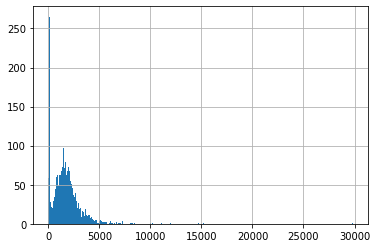

In [14]:
df_all_artists_raw['lyrics_char_length'].hist(bins=1000)

<AxesSubplot:>

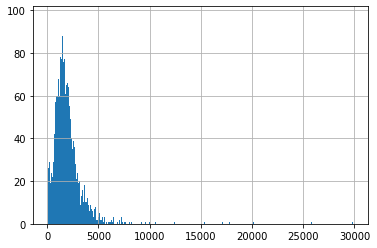

In [15]:
df_all_artists_raw[df_all_artists_raw['lyrics_char_length']>100]['lyrics_char_length'].hist(bins=1000)

# Okay, the initial peak is a bit suspicious. 

In [10]:
df_all_artists_raw[df_all_artists_raw['lyrics_char_length']<100]

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric,lyrics_char_length
71,71.0,Dua Lipa,Drunken Kiss,NaN,NaN,NaN,unreleased,10.0
90,90.0,Dua Lipa,Blame,Unreleased Songs,NaN,NaN,lyrics for this song have not yet been released please come back once they have been released,93.0
91,91.0,Dua Lipa,Roses & Fire,Unreleased Songs,NaN,NaN,snippet oh in my heart i know we might be sharing time i lost my mind they say,78.0
99,99.0,Dua Lipa,Look So Good,NaN,2015.0,2015-01-01,unreleased,10.0
100,100.0,Dua Lipa,Hooligan,Unreleased Songs,2016.0,2016-01-01,unreleased,10.0
120,120.0,Dua Lipa,Down Boys,NaN,NaN,NaN,lyrics for this song have yet to be released please check back once the song has been released,94.0
125,125.0,Dua Lipa,Set Myself On Fire,Unreleased Songs,NaN,NaN,unreleased,10.0
128,128.0,Dua Lipa,Drinking,NaN,NaN,NaN,lyrics for this song have yet to be released please check back once the song has been released,94.0
130,130.0,Dua Lipa,Guilty,Unreleased Songs,NaN,NaN,lyrics from snippet guilty we could blame it on timing if that just,67.0
136,136.0,Dua Lipa,Worst Enemy,NaN,NaN,NaN,lyrics for this song have yet to be released please check back once the song has been released,94.0


In [11]:
df_all_artists_raw[(df_all_artists_raw['lyrics_char_length']>100)&(df_all_artists_raw['lyrics_char_length']<150)]

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric,lyrics_char_length
37,NaN,Ariana Grande,​raindrops (an angel cried),Sweetener,2018,2018-08-17,when raindrops fell down from the sky the day you left me an angel cried oh she cried an angel cried she cried,110.0
96,NaN,Ariana Grande,​reMeMber,Unreleased Songs,None,None,lyrics from snippet close to the light yeah didnt get to say goodbye to you but i feel like i never,101.0
163,NaN,Ariana Grande,​raindrops (an angel cried) [live],​k bye for now (swt live),2019,2019-12-23,when raindrops fell down from the sky the day you left me an angel cried oh she cried an angel cried she cried,110.0
218,NaN,Ariana Grande,Do It Better*,Unreleased Songs,None,None,lyrics from snippet you can't compare one single flip of my hair i get more done than you could ever you do good i do it better better i'm 'bout,145.0
301,NaN,Ariana Grande,Alone (Ariana Grande Demo),NaN,None,None,i wanna be alone for no reason emostions igotta be alone try try try try stop them i losing control i can feel it going i can feel it going,141.0
307,307.0,Drake,Certified Lover Boy*,Certified Lover Boy,NaN,NaN,lyrics from clb merch put my feelings on ice always been a gem certified lover boy somehow still heartless heart is only gettin' colder,136.0
429,429.0,Drake,Get Better,NaN,NaN,NaN,lyrics from snippet drake trust me this ain't about revenge but now i get along better with your friend,104.0
441,441.0,Drake,Work (Demo),NaN,NaN,NaN,lyrics from snippet drake i spilled all my emotions tonight i'm sorry rollin' rollin' rollin' rollin' rollin' you don't even drink at all yeah,143.0
210,210.0,BTS (방탄소년단),OUTRO : Crack,Face Yourself,2018.0,2018-04-04,lyrics v jungkook jin let go let go let go let go i'm ready to let go i'm ready to let go i'm ready to let go i'm ready to let go,129.0
212,212.0,BTS (방탄소년단),INTRO: Calling,MAP OF THE SOUL: 7 ~ The Journey ~,2020.0,2020-07-15,oh oh oh oh oh oh oh oh oh baby yeah 今宵も眠らせない stay gold stay gold ないよ oh oh oh 君の全てに 心惹かれて いつまでも forever gold,109.0


In [13]:
df_all_artists_filtered = df_all_artists_raw[df_all_artists_raw['lyrics_char_length']>100]
df_all_artists_filtered[relevant_columns].to_csv(os.path.join(path, 'df_all_artists_filtered.tsv'), sep='\t', index=False)